In [ ]:
#import library
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import math

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('indomon.csv')
df

Saving indomon.csv to indomon (1).csv


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,8900.0,9275.0,8575.0,8725.0,7647.952148,190042700
1,2018-02-01,8825.0,9100.0,8675.0,8975.0,7867.090820,73215700
2,2018-03-01,8975.0,9150.0,8200.0,8275.0,7253.502441,68634800
3,2018-04-01,8300.0,8800.0,8050.0,8675.0,7604.124023,49093600
4,2018-05-01,8675.0,8825.0,7900.0,8700.0,7626.038574,78781300
...,...,...,...,...,...,...,...
61,2023-02-01,10125.0,10575.0,9900.0,10125.0,10125.000000,71933700
62,2023-03-01,10125.0,10200.0,9275.0,9975.0,9975.000000,108736900
63,2023-04-01,9975.0,10575.0,9850.0,10575.0,10575.000000,66939100
64,2023-05-01,10550.0,11700.0,10325.0,11700.0,11700.000000,278776300


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
61,2023-02-01,10125.0,10575.0,9900.0,10125.0,10125.0,71933700
62,2023-03-01,10125.0,10200.0,9275.0,9975.0,9975.0,108736900
63,2023-04-01,9975.0,10575.0,9850.0,10575.0,10575.0,66939100
64,2023-05-01,10550.0,11700.0,10325.0,11700.0,11700.0,278776300
65,2023-06-01,11575.0,11575.0,10975.0,11325.0,11325.0,167293000


In [ ]:
#jumlah kolom dan baris
df.shape

(66, 7)

In [ ]:
duplicated = df.duplicated().sum()
print("there are %d duplicated records" %(duplicated))

there are 0 duplicated records


In [ ]:
#tampilkan missing data and urutkan dalam urutan secara ascending (naik)
missingDataSummary = df.isna().sum()

#hitung persentase of missing data
missingDataPercentage = (df.isnull().sum()/df.shape[0])

#gabungkan dua seri
missingData = pd.concat([missingDataSummary,
missingDataPercentage], axis=1, keys=['Missing',
'Percentage'])
missingData.sort_values(ascending=False, by='Missing')

,Missing,Percentage
Date,0,0.0
Open,0,0.0
High,0,0.0
Low,0,0.0
Close,0,0.0
Adj Close,0,0.0
Volume,0,0.0


In [ ]:
df.drop('Date', axis=1, inplace = True)
df.drop('Volume', axis=1, inplace = True)
df.drop('Adj Close', axis=1, inplace = True)
df

,Open,High,Low,Close
0,8900.0,9275.0,8575.0,8725.0
1,8825.0,9100.0,8675.0,8975.0
2,8975.0,9150.0,8200.0,8275.0
3,8300.0,8800.0,8050.0,8675.0
4,8675.0,8825.0,7900.0,8700.0
...,...,...,...,...
61,10125.0,10575.0,9900.0,10125.0
62,10125.0,10200.0,9275.0,9975.0
63,9975.0,10575.0,9850.0,10575.0
64,10550.0,11700.0,10325.0,11700.0


In [ ]:
df.head()

,Date,Close
0,2018-01-01,8725.0
1,2018-02-01,8975.0
2,2018-03-01,8275.0
3,2018-04-01,8675.0
4,2018-05-01,8700.0


In [ ]:
import numpy as np
import sklearn.model_selection as ms
x = df[['Open','Low','High']]
y = df['Close']
x_train, x_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.2, random_state=0)
print('Shape of x_train : ', x_train.shape)
print('Shape of x_test : ', x_test.shape)
print('Shape of y_train : ', y_train.shape)
print('Shape of y_test : ', y_test.shape)

Shape of x_train :  (52, 3)
Shape of x_test :  (14, 3)
Shape of y_train :  (52,)
Shape of y_test :  (14,)


In [ ]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
print('Nilai Slope : ', regressor.coef_)
print('Nilai Intercept : ', regressor.intercept_)

Nilai Slope :  [-0.59035678  0.50426247  1.07398106]
Nilai Intercept :  -65.33805298160769


In [ ]:
predicted = regressor.predict(x_test)
dfr = pd.DataFrame({'Actual Price':y_test, 'Predicted Price':predicted})
print(dfr)

    Actual Price  Predicted Price
45        8800.0      9275.013067
28        8150.0      8725.883888
29        9350.0      9435.813317
55        8300.0      8446.116956
63       10575.0     10370.188021
31       10225.0     10490.610167
51        7625.0      7366.545076
46        8450.0      8881.165833
34        9900.0     10489.687410
4         8700.0      8274.873179
35        9575.0      9689.584814
40        8200.0      8201.505997
33        9650.0      9807.556954
48        8725.0      8751.134378


In [ ]:
ape = np.abs((y_test - predicted) / y_test)
mape = np.mean(ape) * 100
print('Mean Absolute Percentage Error = ' ,mape)

Mean Absolute Percentage Error =  3.0113560669948654


In [ ]:
score = regressor.score(x_test, y_test)
print('R Squared = ', score)

R Squared =  0.8468611404503164


<Axes: >

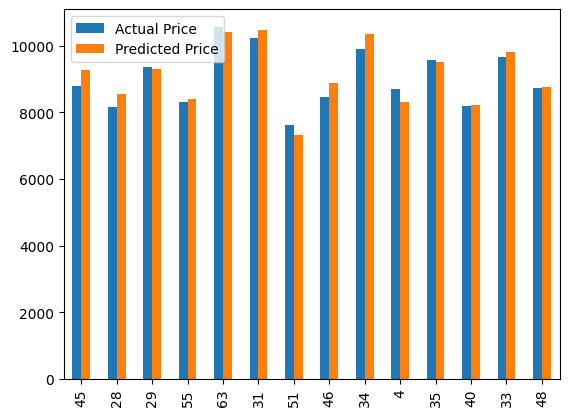

In [ ]:
bar = dfr.head(30)
bar.plot(kind='bar')